<a href="https://colab.research.google.com/github/ghalibbajwa/10-in-one-penetration-testing/blob/main/Z_Image_Turbo_4bit_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/huggingface/diffusers git+https://github.com/Disty0/sdnq

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-lfctpxie
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-lfctpxie
  Resolved https://github.com/huggingface/diffusers to commit 0eac64c7a692e335f4a777d1ffb91d38fe7d7a44
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/Disty0/sdnq to /tmp/pip-req-build-g2wkc85m
  Running command git clone --filter=blob:none --quiet https://github.com/Disty0/sdnq /tmp/pip-req-build-g2wkc85m
  Resolved https://github.com/Disty0/sdnq to commit 5517e63041961758991ebc1dcfe8f28af7381cc9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.36.0.dev0-py3-none-any.whl size=4636029 sha256=283f82a6843826173101f390a93fac50415f3c8f33e

In [3]:
import torch
import diffusers
from sdnq import SDNQConfig # import sdnq to register it into diffusers and transformers
from sdnq.loader import apply_sdnq_options_to_model

pipe = diffusers.ZImagePipeline.from_pretrained("Disty0/Z-Image-Turbo-SDNQ-uint4-svd-r32", torch_dtype=torch.float32, device_map="cpu")
pipe.transformer = apply_sdnq_options_to_model(pipe.transformer, use_quantized_matmul=True)
pipe.text_encoder = apply_sdnq_options_to_model(pipe.text_encoder, use_quantized_matmul=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/487 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

transformer/diffusion_pytorch_model.safe(…):   0%|          | 0.00/3.48G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


RuntimeError: SDNQ Quantized MatMul requires a working Triton install.

In [188]:
base_prompt = "Aira, korean american girl, 19 year old, short black hair, tomboy style, cute, big eyes, expressive face, curvy body, unique face, attractive, imperfect skin"

In [210]:
clothes = ""

In [211]:
pose=""

In [212]:
camera_angle=" camera: amature photography, side angle, from far away camera"

In [213]:
mobile_filter=" raw unedited mobile feel. bad quality, grainy, imperfect image, no depth, low res"

In [216]:
additional_prompt="hiding face with hands, shot from afar, standing in bedroom, shot from back, no face, "

  0%|          | 0/9 [00:00<?, ?it/s]

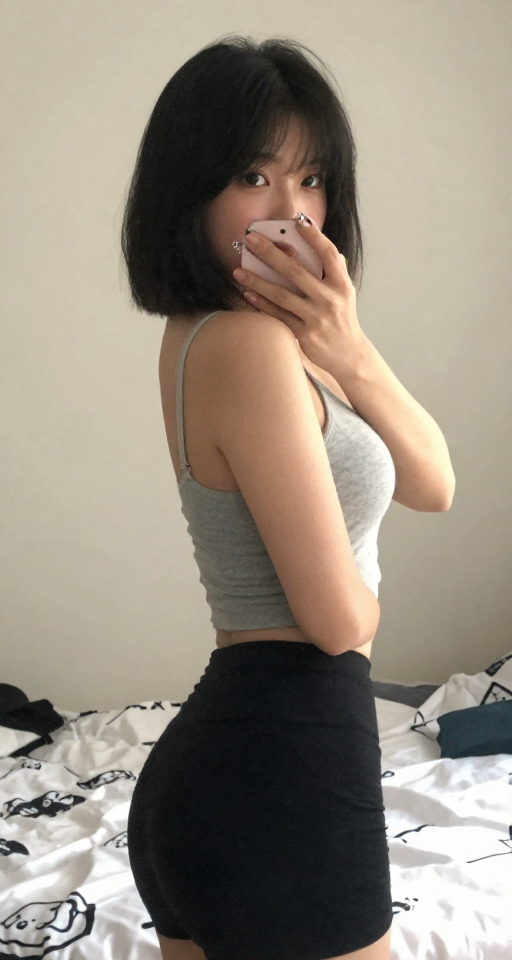

In [217]:
prompt = base_prompt + clothes + additional_prompt +mobile_filter + pose + camera_angle
image = pipe(
    prompt=prompt,
    height=960,
    width=512,
    num_inference_steps=9,
    guidance_scale=0.0,
    generator=torch.manual_seed(21451253),
).images[0]
display(image)